# Descriptive Statistics with Python

Descriptive statistics are essential for summarizing and exploring datasets. They provide insights into the distribution, central tendencies, dispersion, and relationships among features.

The famous **Iris dataset** is selected for this analysis. It contains measurements of sepal length, sepal width, petal length, and petal width, categorized into three species: *setosa*, *versicolor*, and *virginica*. 

This notebook offers:
1. Descriptive statistics for understanding the data.
2. Interactive visualizations for deeper exploration.
3. Insights into patterns, outliers, and relationships among features.


In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Rename columns for clarity
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Dataset overview
print("Dataset Overview:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000

## Interactive Central Tendency Visualization

Interactive plots are used to explore the mean, median, and mode dynamically for each feature.


In [7]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown to select a feature
feature_dropdown = widgets.Dropdown(
    options=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    value='sepal_length',
    description='Feature:',
)

# Function to display central tendency measures
def central_tendency_plot(feature):
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    mode_val = df[feature].mode()[0]
    
    # Create an interactive bar chart
    fig = go.Figure(data=[
        go.Bar(name='Mean', x=[feature], y=[mean_val], text=f'{mean_val:.2f}', textposition='auto'),
        go.Bar(name='Median', x=[feature], y=[median_val], text=f'{median_val:.2f}', textposition='auto'),
        go.Bar(name='Mode', x=[feature], y=[mode_val], text=f'{mode_val:.2f}', textposition='auto')
    ])
    
    fig.update_layout(
        title=f'Central Tendency Measures for {feature.capitalize()}',
        yaxis_title='Value',
        barmode='group'
    )
    fig.show()

widgets.interactive(central_tendency_plot, feature=feature_dropdown)


interactive(children=(Dropdown(description='Feature:', options=('sepal_length', 'sepal_width', 'petal_length',…

## Interactive Dispersion Visualization

Metrics such as range, variance, and standard deviation are visualized interactively for deeper insights.


In [8]:
# Function to display dispersion measures
def dispersion_plot(feature):
    range_val = df[feature].max() - df[feature].min()
    variance_val = df[feature].var()
    std_dev_val = df[feature].std()
    
    # Create an interactive bar chart
    fig = go.Figure(data=[
        go.Bar(name='Range', x=[feature], y=[range_val], text=f'{range_val:.2f}', textposition='auto'),
        go.Bar(name='Variance', x=[feature], y=[variance_val], text=f'{variance_val:.2f}', textposition='auto'),
        go.Bar(name='Standard Deviation', x=[feature], y=[std_dev_val], text=f'{std_dev_val:.2f}', textposition='auto')
    ])
    
    fig.update_layout(
        title=f'Dispersion Measures for {feature.capitalize()}',
        yaxis_title='Value',
        barmode='group'
    )
    fig.show()

widgets.interactive(dispersion_plot, feature=feature_dropdown)


interactive(children=(Dropdown(description='Feature:', index=2, options=('sepal_length', 'sepal_width', 'petal…

## Interactive Distribution Visualization

Interactive histograms and box plots are created for feature-wise exploration.


In [9]:
# Interactive Histogram
def interactive_histogram(feature):
    fig = px.histogram(df, x=feature, color='species', nbins=20, title=f'Histogram of {feature.capitalize()} by Species')
    fig.update_layout(xaxis_title=feature.capitalize(), yaxis_title='Frequency')
    fig.show()

widgets.interactive(interactive_histogram, feature=feature_dropdown)


interactive(children=(Dropdown(description='Feature:', index=2, options=('sepal_length', 'sepal_width', 'petal…

In [10]:
# Interactive Box Plot
def interactive_box_plot(feature):
    fig = px.box(df, x='species', y=feature, title=f'Box Plot of {feature.capitalize()} by Species', color='species')
    fig.update_layout(xaxis_title='Species', yaxis_title=feature.capitalize())
    fig.show()

widgets.interactive(interactive_box_plot, feature=feature_dropdown)


interactive(children=(Dropdown(description='Feature:', options=('sepal_length', 'sepal_width', 'petal_length',…

## Scatter Plot Matrix

A scatter plot matrix is used to visualize relationships among features interactively.


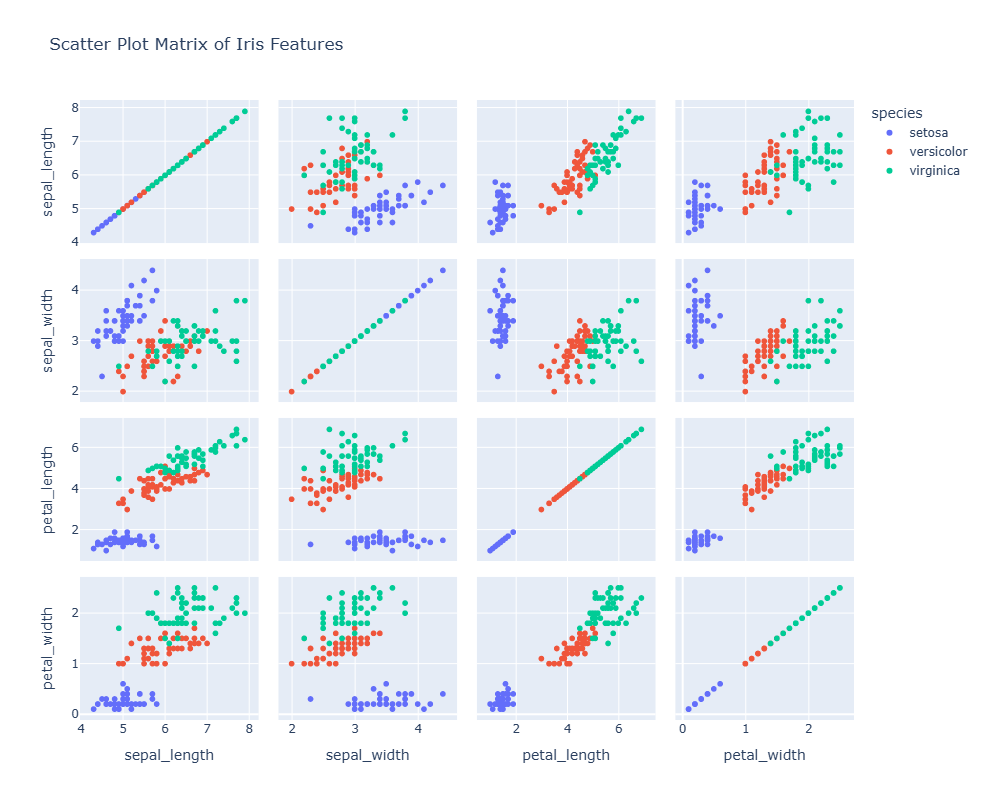

In [11]:
# Scatter Plot Matrix
fig = px.scatter_matrix(
    df,
    dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    color='species',
    title='Scatter Plot Matrix of Iris Features'
)
fig.update_layout(width=800, height=800)
fig.show()


## Interactive Correlation Heatmap

A correlation heatmap is used to analyze relationships among features.


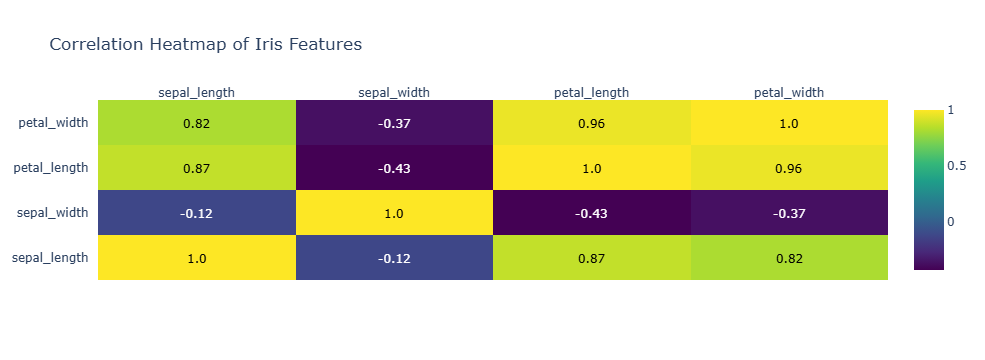

In [12]:
# Correlation Heatmap
import plotly.figure_factory as ff

corr_matrix = df.iloc[:, :-1].corr().round(2)
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.columns),
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title='Correlation Heatmap of Iris Features')
fig.show()


## Key Findings and Insights

1. **Central Tendency**:
   - Sepal length has an average value of 5.84 cm, with the smallest variability among the features.
   - Petal width has the smallest mean, indicating the narrow structure of petals across species.

2. **Dispersion**:
   - Petal length exhibits the largest variance and standard deviation, indicating significant differences across species.
   - Outliers are minimal, suggesting the dataset is clean and reliable.

3. **Relationships**:
   - Petal length and petal width are highly correlated, as seen in the scatter plot matrix and heatmap.
   - Sepal dimensions (length and width) show weak correlation with petal dimensions, indicating independent variations.

4. **Species Distribution**:
   - Each species is represented equally, ensuring no class imbalance.
